In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LET US BUILD OUR OWN NEURAL NETWORK FROM SCRATCH
# CREATTING A CLASSS

# WE ARE APPLYING THIS FOR OUTPUT SO THAT THE BEST CLASSIFICATION CAN COME 
def softmax(y_):
    
    exp=np.exp(y_)
    output=exp/np.sum(exp,axis=1,keepdims=True)
    return output

class Neural_Network:
    
    def __init__(self,input_layer,hidden_layers,output_layer):
        
        #INITLIZE THE WEIGHTS AND BIASES HERE,THAT IS WHAT YOU NEED TO DO
        model={}
        #CREATE A DICTIONARY SO THAT YOU CAN STORE WEIGHTS AND BAIS AND YOU CAN WORK WITH IT
        #STORE IT IN THE FORM OF MATRIX
        #THE WEIGHT HAS TO BE BETWEEN -0.5 to +0.5
        model['W1']=np.random.randn(input_layer,hidden_layers[0])
        model['B1']=np.random.randn(hidden_layers[0])
        #FOR THE FIRST LAYER
        
        model['W2']=np.random.randn(hidden_layers[0],hidden_layers[1])
        model['B2']=np.random.randn(hidden_layers[1])
        
        #FOR THE SECOND LAYER
        
        model['W3']=np.random.randn(hidden_layers[1],output_layer)
        model['B3']=np.random.randn(output_layer)
        
        # FOR THE THIRD LAYER
        #YOU CAN ADD HOW MANY LAYERS YOU WANT LIKE THIS
        
        self.model=model
        
        
    #NOW LET US DO FORWARD PROPOGATION
    #IT TAKES ONLY ONE ARGUMENT THAT IS THE DATA
    def forward(self,X):
        
        #WE HAVE TO UNPACK THE WEIGHTS
        W1,B1,W2,B2,W3,B3=self.model
        
        #LET US DO FORWARD PROPOGATION
        
        aba=np.dot(X,self.model['W1'])+self.model['B1']
        a1=np.tanh(aba)
        #AVTIVATION FUNCTION
        
        aba2=np.dot(a1,self.model['W2'])+self.model['B2']
        a2=np.tanh(aba2)
        #FOR THE SECOND LAYER
        
        aba3=np.dot(a2,self.model['W3'])+self.model['B3']
        y_=softmax(aba3)
        # I AM STORING ALL THE ANSWERS IN THE ACTIVATION INPUTS
        self.activation_inputs=(a1,a2,y_)
        return y_
    
    
    #NOW THE MOST IMPORTANT BACKWARD PROPAGATION
    def backward(self,X,Y,learning_rate):
        #THE ABOVE Y IN THE PARAMETER ARE THE ACTUAL ANSWERS
        #UNPACK THE ACTIVATION INPUTS
        #UNPACK OF THE WEIGHTS
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        B1,B2,B3=self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_=self.activation_inputs
        m=X.shape[0]
        #FOR THE THIRD LAYER
        delta3=y_-Y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        #FOR THE SECOND HIDDEN LAYER
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        #FOR THE FIRST LAYER
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        #THIS ENDED BACKPROPAGATION 
        #WE HAVE TO CHANGE THE WEIGTHS
        self.model['W1']=self.model['W1']-learning_rate*dw1
        self.model['B1']=self.model['B1']-learning_rate*db1
        
        self.model['W2']=self.model['W2']-learning_rate*dw2
        self.model['B2']=self.model['B2']-learning_rate*db2
        
        self.model['W3']=self.model['W3']-learning_rate*dw3
        self.model['B3']=self.model['B3']-learning_rate*db3
        #print(W1)
        #print(W2)
        #print(W3)
        #THIS FINISHES BACKPROPGATION AND UPDATION OF WEIGHTS
        

    # THIS IS THE PREDICT FUNCTION 
    def predict(self,X):
        y_pred=self.forward(X)
        #GETTING THE HIGHEST PROBABILITY
        youtput=np.argmax(y_pred,axis=1)
        return youtput
    
    #LET US ADD SUMMARY OF THE DEATILS WHAT WE HAVE DONE IN THE ABOVE SECTOR
    def summary(self):
        
        #UNPACK EVERUTHING WHAT WE HAVE DONE IN THE FORWARD AND BACKWARD PROPAGATION
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        B1,B2,B3=self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_=self.activation_inputs
        
        print('W1'+str(W1.shape))
        print('a1'+str(a1.shape))
        print('W2'+str(W2.shape))
        print('a2'+str(a2.shape))
        print('W3'+str(W3.shape))
        print('y_'+str(y_.shape))
        
        #PRINTED ALL THE SUMMARY WHAT WE WANTED TO PRINT
        #THIS COMPLETES THE NEURAL NETWORK IMPLEMENTATION 
        #IF WE USE TENSOR FLOW AND OTHER THINGS IT WILL BE DONE IN SIMPLE CODES 
#LET US WRITE THE LOSS FUNCTION
#THIS FUNCTION TAKES TWO PARAMETERS ONE IS THE PREDICTED AND OTHER ONE IS THE TRUE VALUES
# WE WONT USE MSE[MEAN SQUARED ERROR] BEACUSE IT HAS ONE OR MORE OPTIMAL POINTS
# WE WILL USE CROSS_ENTROPHY AS IT HAS ONLY ONE OPTIMAL POINT
def loss(y_,y):
    l=-np.mean(y*np.log(y_))
    return l

def one_hot(y,depth):
    length=y.shape[0]
    newy=np.zeros((length,depth))
    newy[np.arange(length),y]=1
    return newy 
#THIS COMPLETES OUR NEURAL NETWORK IMPLEMENTATION

In [3]:
#LET US TRAIN OUR MODEL

In [4]:
#LET US IMPORT THE DATASET NOW

In [5]:
from sklearn.datasets import make_circles

In [6]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=.05,random_state=1,factor=0.8)

In [7]:
X,Y

(array([[ 2.16257929e-01,  8.22008851e-01],
        [-4.28665275e-01,  5.79143288e-01],
        [ 4.01005944e-01,  9.28935904e-01],
        [-1.66835348e-01,  9.36769727e-01],
        [ 7.26337346e-01, -4.58767631e-01],
        [ 7.47282687e-01, -2.18246933e-01],
        [ 2.56007846e-02,  8.04670383e-01],
        [ 7.35773094e-01,  6.99858574e-01],
        [ 1.03903236e+00, -1.27403362e-01],
        [-6.14903394e-01,  7.66229655e-01],
        [-1.35610956e-01,  8.04907698e-01],
        [-4.21034653e-01, -8.87658055e-01],
        [-8.66527160e-01,  2.03851962e-01],
        [-1.00047049e-01,  1.02353018e+00],
        [ 1.92022844e-01,  8.17033384e-01],
        [-5.48029231e-02, -1.14769576e+00],
        [-6.05363690e-02, -7.36992460e-01],
        [ 4.40439293e-01,  5.76624885e-01],
        [-9.55539662e-01, -4.51461507e-01],
        [-8.31990482e-01, -4.92495418e-01],
        [ 3.90841168e-01,  6.94574344e-01],
        [ 9.77686827e-02,  7.86605850e-01],
        [ 2.47851048e-02,  7.031

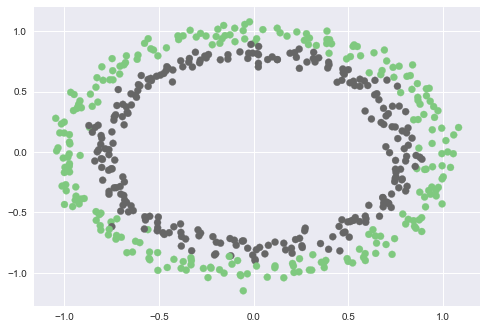

In [8]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()
#THIS IS A COMPLETE A NON LINEAR DATASET IF WE USE ML ALGORITHMS THE PREDICTIONS WILL BE TOO LESS
# IT IS BETTER TO USE DEEP LEARNING

In [9]:
#LET US INITILIAZE OUR MODEL FIRST BEFORE THE TRAINING DATASET
#DEFINE ALL THE LAYERS
input_layer=2
#THESE ARE THE HIDDEN LAYERS
hidden_layers=[10,5]
#BECUASE WE HAVE TO TWO OUTPUTS 0 or 1
output_layer=2
model=Neural_Network(input_layer,hidden_layers,output_layer)

In [10]:
#NOW WE HAVE TO TRAIN THE DATA SET
#LET US CALL A FUNCTION FOR THAT
# TRAIN NEEDS THREE ARGUMENTS X,Y,EPOCHS,MODEL
def train(X,Y,epochs,model):
    
    #DO ONE HOT VECOTR FOT y
    #DEPTH IS TWO BECAUSE IT TAKES TWO CLASSES
    ytrue=one_hot(Y,2)
    #LET US INITLIAZE THE LEARNING RATE
    learning_rate=0.001
    #ITERATING FOR HOW MANY TIMES YOU WANT
    for i in range(epochs):
        
        answer=model.forward(X)
        #LET US CALCULATE THE LOSS FUNCTION
        lossanswer=loss(answer,ytrue)
        lossanswer=round(lossanswer,4)
        #print('IN'+' '+str(i)+'epochs',+' '+'loss'+' '+'is'+str(lossanswer))
        print('IN'+' '+str(i)+' '+'epoch'+' '+'loss'+' '+'is'+' '+str(lossanswer))
        #NOW LET US DO BACKPROPAGATION FOR THIS
        model.backward(X,ytrue,learning_rate)
        
    print('THE SUMMARY OF THIS NEWWORK IS')
    model.summary()
        
    return answer

In [11]:
poweranswer=train(X,Y,10000,model)

IN 0 epoch loss is 0.8633
IN 1 epoch loss is 0.4738
IN 2 epoch loss is 0.3491
IN 3 epoch loss is 0.3459
IN 4 epoch loss is 0.3454
IN 5 epoch loss is 0.3449
IN 6 epoch loss is 0.3444
IN 7 epoch loss is 0.344
IN 8 epoch loss is 0.3436
IN 9 epoch loss is 0.3433
IN 10 epoch loss is 0.343
IN 11 epoch loss is 0.3427
IN 12 epoch loss is 0.3425
IN 13 epoch loss is 0.3423
IN 14 epoch loss is 0.342
IN 15 epoch loss is 0.3419
IN 16 epoch loss is 0.3417
IN 17 epoch loss is 0.3415
IN 18 epoch loss is 0.3413
IN 19 epoch loss is 0.3411
IN 20 epoch loss is 0.341
IN 21 epoch loss is 0.3408
IN 22 epoch loss is 0.3407
IN 23 epoch loss is 0.3405
IN 24 epoch loss is 0.3404
IN 25 epoch loss is 0.3402
IN 26 epoch loss is 0.3401
IN 27 epoch loss is 0.3399
IN 28 epoch loss is 0.3398
IN 29 epoch loss is 0.3396
IN 30 epoch loss is 0.3395
IN 31 epoch loss is 0.3393
IN 32 epoch loss is 0.3392
IN 33 epoch loss is 0.339
IN 34 epoch loss is 0.3389
IN 35 epoch loss is 0.3387
IN 36 epoch loss is 0.3386
IN 37 epoch loss

IN 327 epoch loss is 0.2821
IN 328 epoch loss is 0.1912
IN 329 epoch loss is 0.1726
IN 330 epoch loss is 0.1837
IN 331 epoch loss is 0.239
IN 332 epoch loss is 0.1958
IN 333 epoch loss is 0.2305
IN 334 epoch loss is 0.2037
IN 335 epoch loss is 0.2538
IN 336 epoch loss is 0.192
IN 337 epoch loss is 0.201
IN 338 epoch loss is 0.2045
IN 339 epoch loss is 0.2694
IN 340 epoch loss is 0.1881
IN 341 epoch loss is 0.1752
IN 342 epoch loss is 0.1882
IN 343 epoch loss is 0.2498
IN 344 epoch loss is 0.1871
IN 345 epoch loss is 0.1966
IN 346 epoch loss is 0.2063
IN 347 epoch loss is 0.2802
IN 348 epoch loss is 0.1871
IN 349 epoch loss is 0.1663
IN 350 epoch loss is 0.1753
IN 351 epoch loss is 0.2248
IN 352 epoch loss is 0.1923
IN 353 epoch loss is 0.2385
IN 354 epoch loss is 0.1938
IN 355 epoch loss is 0.2291
IN 356 epoch loss is 0.1952
IN 357 epoch loss is 0.2358
IN 358 epoch loss is 0.1903
IN 359 epoch loss is 0.217
IN 360 epoch loss is 0.1959
IN 361 epoch loss is 0.2443
IN 362 epoch loss is 0.1

IN 725 epoch loss is 0.1708
IN 726 epoch loss is 0.1588
IN 727 epoch loss is 0.2346
IN 728 epoch loss is 0.1381
IN 729 epoch loss is 0.1474
IN 730 epoch loss is 0.1394
IN 731 epoch loss is 0.1893
IN 732 epoch loss is 0.152
IN 733 epoch loss is 0.2069
IN 734 epoch loss is 0.1524
IN 735 epoch loss is 0.1946
IN 736 epoch loss is 0.1601
IN 737 epoch loss is 0.2173
IN 738 epoch loss is 0.1461
IN 739 epoch loss is 0.1696
IN 740 epoch loss is 0.1525
IN 741 epoch loss is 0.2059
IN 742 epoch loss is 0.1394
IN 743 epoch loss is 0.1591
IN 744 epoch loss is 0.1468
IN 745 epoch loss is 0.196
IN 746 epoch loss is 0.1401
IN 747 epoch loss is 0.167
IN 748 epoch loss is 0.15
IN 749 epoch loss is 0.202
IN 750 epoch loss is 0.1408
IN 751 epoch loss is 0.1659
IN 752 epoch loss is 0.1506
IN 753 epoch loss is 0.2039
IN 754 epoch loss is 0.1403
IN 755 epoch loss is 0.1637
IN 756 epoch loss is 0.1495
IN 757 epoch loss is 0.2019
IN 758 epoch loss is 0.14
IN 759 epoch loss is 0.1641
IN 760 epoch loss is 0.1492


IN 1132 epoch loss is 0.1205
IN 1133 epoch loss is 0.1447
IN 1134 epoch loss is 0.1203
IN 1135 epoch loss is 0.1445
IN 1136 epoch loss is 0.1202
IN 1137 epoch loss is 0.1444
IN 1138 epoch loss is 0.1201
IN 1139 epoch loss is 0.1442
IN 1140 epoch loss is 0.12
IN 1141 epoch loss is 0.1441
IN 1142 epoch loss is 0.1199
IN 1143 epoch loss is 0.144
IN 1144 epoch loss is 0.1197
IN 1145 epoch loss is 0.1438
IN 1146 epoch loss is 0.1196
IN 1147 epoch loss is 0.1437
IN 1148 epoch loss is 0.1195
IN 1149 epoch loss is 0.1435
IN 1150 epoch loss is 0.1194
IN 1151 epoch loss is 0.1434
IN 1152 epoch loss is 0.1193
IN 1153 epoch loss is 0.1432
IN 1154 epoch loss is 0.1192
IN 1155 epoch loss is 0.1431
IN 1156 epoch loss is 0.119
IN 1157 epoch loss is 0.1429
IN 1158 epoch loss is 0.1189
IN 1159 epoch loss is 0.1427
IN 1160 epoch loss is 0.1188
IN 1161 epoch loss is 0.1426
IN 1162 epoch loss is 0.1186
IN 1163 epoch loss is 0.1424
IN 1164 epoch loss is 0.1185
IN 1165 epoch loss is 0.1423
IN 1166 epoch loss

IN 1453 epoch loss is 0.2336
IN 1454 epoch loss is 0.1468
IN 1455 epoch loss is 0.1701
IN 1456 epoch loss is 0.1071
IN 1457 epoch loss is 0.1069
IN 1458 epoch loss is 0.0847
IN 1459 epoch loss is 0.0819
IN 1460 epoch loss is 0.0729
IN 1461 epoch loss is 0.0706
IN 1462 epoch loss is 0.0664
IN 1463 epoch loss is 0.0647
IN 1464 epoch loss is 0.0623
IN 1465 epoch loss is 0.0609
IN 1466 epoch loss is 0.0594
IN 1467 epoch loss is 0.0583
IN 1468 epoch loss is 0.0574
IN 1469 epoch loss is 0.0566
IN 1470 epoch loss is 0.0559
IN 1471 epoch loss is 0.0553
IN 1472 epoch loss is 0.0548
IN 1473 epoch loss is 0.0543
IN 1474 epoch loss is 0.0539
IN 1475 epoch loss is 0.0536
IN 1476 epoch loss is 0.0532
IN 1477 epoch loss is 0.0529
IN 1478 epoch loss is 0.0527
IN 1479 epoch loss is 0.0524
IN 1480 epoch loss is 0.0522
IN 1481 epoch loss is 0.052
IN 1482 epoch loss is 0.0518
IN 1483 epoch loss is 0.0516
IN 1484 epoch loss is 0.0515
IN 1485 epoch loss is 0.0513
IN 1486 epoch loss is 0.0512
IN 1487 epoch l

IN 1770 epoch loss is 0.0712
IN 1771 epoch loss is 0.0738
IN 1772 epoch loss is 0.0678
IN 1773 epoch loss is 0.0709
IN 1774 epoch loss is 0.0658
IN 1775 epoch loss is 0.0683
IN 1776 epoch loss is 0.064
IN 1777 epoch loss is 0.0662
IN 1778 epoch loss is 0.0628
IN 1779 epoch loss is 0.065
IN 1780 epoch loss is 0.0626
IN 1781 epoch loss is 0.0653
IN 1782 epoch loss is 0.0638
IN 1783 epoch loss is 0.0677
IN 1784 epoch loss is 0.0669
IN 1785 epoch loss is 0.073
IN 1786 epoch loss is 0.0725
IN 1787 epoch loss is 0.0825
IN 1788 epoch loss is 0.0815
IN 1789 epoch loss is 0.0984
IN 1790 epoch loss is 0.0937
IN 1791 epoch loss is 0.1208
IN 1792 epoch loss is 0.1053
IN 1793 epoch loss is 0.139
IN 1794 epoch loss is 0.1096
IN 1795 epoch loss is 0.1403
IN 1796 epoch loss is 0.1122
IN 1797 epoch loss is 0.144
IN 1798 epoch loss is 0.1318
IN 1799 epoch loss is 0.1915
IN 1800 epoch loss is 0.1582
IN 1801 epoch loss is 0.2412
IN 1802 epoch loss is 0.1103
IN 1803 epoch loss is 0.1266
IN 1804 epoch loss 

IN 2190 epoch loss is 0.0542
IN 2191 epoch loss is 0.0523
IN 2192 epoch loss is 0.0512
IN 2193 epoch loss is 0.0498
IN 2194 epoch loss is 0.049
IN 2195 epoch loss is 0.0481
IN 2196 epoch loss is 0.0475
IN 2197 epoch loss is 0.047
IN 2198 epoch loss is 0.0466
IN 2199 epoch loss is 0.0462
IN 2200 epoch loss is 0.046
IN 2201 epoch loss is 0.0457
IN 2202 epoch loss is 0.0455
IN 2203 epoch loss is 0.0454
IN 2204 epoch loss is 0.0452
IN 2205 epoch loss is 0.0451
IN 2206 epoch loss is 0.045
IN 2207 epoch loss is 0.0448
IN 2208 epoch loss is 0.0447
IN 2209 epoch loss is 0.0446
IN 2210 epoch loss is 0.0445
IN 2211 epoch loss is 0.0444
IN 2212 epoch loss is 0.0444
IN 2213 epoch loss is 0.0443
IN 2214 epoch loss is 0.0442
IN 2215 epoch loss is 0.0441
IN 2216 epoch loss is 0.0441
IN 2217 epoch loss is 0.044
IN 2218 epoch loss is 0.0439
IN 2219 epoch loss is 0.0439
IN 2220 epoch loss is 0.0438
IN 2221 epoch loss is 0.0438
IN 2222 epoch loss is 0.0437
IN 2223 epoch loss is 0.0437
IN 2224 epoch loss 

IN 2482 epoch loss is 0.0416
IN 2483 epoch loss is 0.0418
IN 2484 epoch loss is 0.0421
IN 2485 epoch loss is 0.0425
IN 2486 epoch loss is 0.0431
IN 2487 epoch loss is 0.0438
IN 2488 epoch loss is 0.0449
IN 2489 epoch loss is 0.0464
IN 2490 epoch loss is 0.0486
IN 2491 epoch loss is 0.0514
IN 2492 epoch loss is 0.056
IN 2493 epoch loss is 0.0622
IN 2494 epoch loss is 0.075
IN 2495 epoch loss is 0.1199
IN 2496 epoch loss is 0.34
IN 2497 epoch loss is 0.5997
IN 2498 epoch loss is 0.4997
IN 2499 epoch loss is 0.3667
IN 2500 epoch loss is 0.4077
IN 2501 epoch loss is 0.2019
IN 2502 epoch loss is 0.2954
IN 2503 epoch loss is 0.3915
IN 2504 epoch loss is 0.2763
IN 2505 epoch loss is 0.1486
IN 2506 epoch loss is 0.1878
IN 2507 epoch loss is 0.1057
IN 2508 epoch loss is 0.1441
IN 2509 epoch loss is 0.0912
IN 2510 epoch loss is 0.1126
IN 2511 epoch loss is 0.0902
IN 2512 epoch loss is 0.1148
IN 2513 epoch loss is 0.0898
IN 2514 epoch loss is 0.1166
IN 2515 epoch loss is 0.0898
IN 2516 epoch loss

IN 2775 epoch loss is 0.0402
IN 2776 epoch loss is 0.0402
IN 2777 epoch loss is 0.0401
IN 2778 epoch loss is 0.0401
IN 2779 epoch loss is 0.0401
IN 2780 epoch loss is 0.0401
IN 2781 epoch loss is 0.0401
IN 2782 epoch loss is 0.0401
IN 2783 epoch loss is 0.0401
IN 2784 epoch loss is 0.0401
IN 2785 epoch loss is 0.0401
IN 2786 epoch loss is 0.0401
IN 2787 epoch loss is 0.0402
IN 2788 epoch loss is 0.0403
IN 2789 epoch loss is 0.0404
IN 2790 epoch loss is 0.0405
IN 2791 epoch loss is 0.0407
IN 2792 epoch loss is 0.041
IN 2793 epoch loss is 0.0415
IN 2794 epoch loss is 0.0419
IN 2795 epoch loss is 0.0429
IN 2796 epoch loss is 0.0437
IN 2797 epoch loss is 0.0458
IN 2798 epoch loss is 0.0473
IN 2799 epoch loss is 0.0516
IN 2800 epoch loss is 0.0545
IN 2801 epoch loss is 0.0642
IN 2802 epoch loss is 0.0724
IN 2803 epoch loss is 0.1048
IN 2804 epoch loss is 0.1881
IN 2805 epoch loss is 0.5143
IN 2806 epoch loss is 0.5239
IN 2807 epoch loss is 0.3618
IN 2808 epoch loss is 0.2772
IN 2809 epoch l

IN 3124 epoch loss is 0.0448
IN 3125 epoch loss is 0.0443
IN 3126 epoch loss is 0.044
IN 3127 epoch loss is 0.0437
IN 3128 epoch loss is 0.0434
IN 3129 epoch loss is 0.0432
IN 3130 epoch loss is 0.043
IN 3131 epoch loss is 0.0428
IN 3132 epoch loss is 0.0427
IN 3133 epoch loss is 0.0425
IN 3134 epoch loss is 0.0424
IN 3135 epoch loss is 0.0422
IN 3136 epoch loss is 0.0421
IN 3137 epoch loss is 0.042
IN 3138 epoch loss is 0.0419
IN 3139 epoch loss is 0.0417
IN 3140 epoch loss is 0.0416
IN 3141 epoch loss is 0.0415
IN 3142 epoch loss is 0.0414
IN 3143 epoch loss is 0.0413
IN 3144 epoch loss is 0.0412
IN 3145 epoch loss is 0.0412
IN 3146 epoch loss is 0.0411
IN 3147 epoch loss is 0.041
IN 3148 epoch loss is 0.0409
IN 3149 epoch loss is 0.0409
IN 3150 epoch loss is 0.0408
IN 3151 epoch loss is 0.0407
IN 3152 epoch loss is 0.0407
IN 3153 epoch loss is 0.0406
IN 3154 epoch loss is 0.0405
IN 3155 epoch loss is 0.0405
IN 3156 epoch loss is 0.0404
IN 3157 epoch loss is 0.0404
IN 3158 epoch loss

IN 3494 epoch loss is 0.0386
IN 3495 epoch loss is 0.0386
IN 3496 epoch loss is 0.0386
IN 3497 epoch loss is 0.0386
IN 3498 epoch loss is 0.0385
IN 3499 epoch loss is 0.0385
IN 3500 epoch loss is 0.0385
IN 3501 epoch loss is 0.0385
IN 3502 epoch loss is 0.0384
IN 3503 epoch loss is 0.0384
IN 3504 epoch loss is 0.0384
IN 3505 epoch loss is 0.0384
IN 3506 epoch loss is 0.0384
IN 3507 epoch loss is 0.0383
IN 3508 epoch loss is 0.0383
IN 3509 epoch loss is 0.0383
IN 3510 epoch loss is 0.0383
IN 3511 epoch loss is 0.0383
IN 3512 epoch loss is 0.0382
IN 3513 epoch loss is 0.0382
IN 3514 epoch loss is 0.0382
IN 3515 epoch loss is 0.0382
IN 3516 epoch loss is 0.0382
IN 3517 epoch loss is 0.0381
IN 3518 epoch loss is 0.0381
IN 3519 epoch loss is 0.0381
IN 3520 epoch loss is 0.0381
IN 3521 epoch loss is 0.0381
IN 3522 epoch loss is 0.038
IN 3523 epoch loss is 0.038
IN 3524 epoch loss is 0.038
IN 3525 epoch loss is 0.038
IN 3526 epoch loss is 0.038
IN 3527 epoch loss is 0.038
IN 3528 epoch loss i

IN 3866 epoch loss is 0.0373
IN 3867 epoch loss is 0.0372
IN 3868 epoch loss is 0.0372
IN 3869 epoch loss is 0.0372
IN 3870 epoch loss is 0.0372
IN 3871 epoch loss is 0.0372
IN 3872 epoch loss is 0.0371
IN 3873 epoch loss is 0.0371
IN 3874 epoch loss is 0.0371
IN 3875 epoch loss is 0.0371
IN 3876 epoch loss is 0.0371
IN 3877 epoch loss is 0.0372
IN 3878 epoch loss is 0.0372
IN 3879 epoch loss is 0.0373
IN 3880 epoch loss is 0.0374
IN 3881 epoch loss is 0.0375
IN 3882 epoch loss is 0.0377
IN 3883 epoch loss is 0.0382
IN 3884 epoch loss is 0.0385
IN 3885 epoch loss is 0.0396
IN 3886 epoch loss is 0.0404
IN 3887 epoch loss is 0.0433
IN 3888 epoch loss is 0.0453
IN 3889 epoch loss is 0.0544
IN 3890 epoch loss is 0.0602
IN 3891 epoch loss is 0.096
IN 3892 epoch loss is 0.1473
IN 3893 epoch loss is 0.32
IN 3894 epoch loss is 0.3617
IN 3895 epoch loss is 0.2292
IN 3896 epoch loss is 0.1931
IN 3897 epoch loss is 0.3793
IN 3898 epoch loss is 0.4124
IN 3899 epoch loss is 0.2615
IN 3900 epoch los

IN 4320 epoch loss is 0.0389
IN 4321 epoch loss is 0.0386
IN 4322 epoch loss is 0.0386
IN 4323 epoch loss is 0.0384
IN 4324 epoch loss is 0.0384
IN 4325 epoch loss is 0.0382
IN 4326 epoch loss is 0.0382
IN 4327 epoch loss is 0.038
IN 4328 epoch loss is 0.038
IN 4329 epoch loss is 0.0379
IN 4330 epoch loss is 0.0379
IN 4331 epoch loss is 0.0378
IN 4332 epoch loss is 0.0379
IN 4333 epoch loss is 0.0378
IN 4334 epoch loss is 0.0378
IN 4335 epoch loss is 0.0377
IN 4336 epoch loss is 0.0379
IN 4337 epoch loss is 0.0378
IN 4338 epoch loss is 0.0379
IN 4339 epoch loss is 0.0378
IN 4340 epoch loss is 0.0381
IN 4341 epoch loss is 0.038
IN 4342 epoch loss is 0.0384
IN 4343 epoch loss is 0.0383
IN 4344 epoch loss is 0.0389
IN 4345 epoch loss is 0.0388
IN 4346 epoch loss is 0.0398
IN 4347 epoch loss is 0.0398
IN 4348 epoch loss is 0.0416
IN 4349 epoch loss is 0.0416
IN 4350 epoch loss is 0.0452
IN 4351 epoch loss is 0.0452
IN 4352 epoch loss is 0.0535
IN 4353 epoch loss is 0.0539
IN 4354 epoch los

IN 4651 epoch loss is 0.0361
IN 4652 epoch loss is 0.0362
IN 4653 epoch loss is 0.0365
IN 4654 epoch loss is 0.0367
IN 4655 epoch loss is 0.0371
IN 4656 epoch loss is 0.0376
IN 4657 epoch loss is 0.0386
IN 4658 epoch loss is 0.0395
IN 4659 epoch loss is 0.0421
IN 4660 epoch loss is 0.0441
IN 4661 epoch loss is 0.0511
IN 4662 epoch loss is 0.0558
IN 4663 epoch loss is 0.0773
IN 4664 epoch loss is 0.0965
IN 4665 epoch loss is 0.1881
IN 4666 epoch loss is 0.3085
IN 4667 epoch loss is 0.6078
IN 4668 epoch loss is 0.4308
IN 4669 epoch loss is 0.1842
IN 4670 epoch loss is 0.1792
IN 4671 epoch loss is 0.3704
IN 4672 epoch loss is 0.1487
IN 4673 epoch loss is 0.093
IN 4674 epoch loss is 0.1376
IN 4675 epoch loss is 0.1385
IN 4676 epoch loss is 0.3323
IN 4677 epoch loss is 0.1798
IN 4678 epoch loss is 0.307
IN 4679 epoch loss is 0.1122
IN 4680 epoch loss is 0.1781
IN 4681 epoch loss is 0.0594
IN 4682 epoch loss is 0.0509
IN 4683 epoch loss is 0.0484
IN 4684 epoch loss is 0.047
IN 4685 epoch los

IN 4992 epoch loss is 0.0402
IN 4993 epoch loss is 0.04
IN 4994 epoch loss is 0.0398
IN 4995 epoch loss is 0.0396
IN 4996 epoch loss is 0.0394
IN 4997 epoch loss is 0.0392
IN 4998 epoch loss is 0.0391
IN 4999 epoch loss is 0.0389
IN 5000 epoch loss is 0.0388
IN 5001 epoch loss is 0.0386
IN 5002 epoch loss is 0.0385
IN 5003 epoch loss is 0.0384
IN 5004 epoch loss is 0.0383
IN 5005 epoch loss is 0.0381
IN 5006 epoch loss is 0.038
IN 5007 epoch loss is 0.0379
IN 5008 epoch loss is 0.0378
IN 5009 epoch loss is 0.0378
IN 5010 epoch loss is 0.0377
IN 5011 epoch loss is 0.0376
IN 5012 epoch loss is 0.0375
IN 5013 epoch loss is 0.0374
IN 5014 epoch loss is 0.0373
IN 5015 epoch loss is 0.0373
IN 5016 epoch loss is 0.0372
IN 5017 epoch loss is 0.0371
IN 5018 epoch loss is 0.0371
IN 5019 epoch loss is 0.037
IN 5020 epoch loss is 0.0369
IN 5021 epoch loss is 0.0369
IN 5022 epoch loss is 0.0368
IN 5023 epoch loss is 0.0368
IN 5024 epoch loss is 0.0367
IN 5025 epoch loss is 0.0367
IN 5026 epoch loss

IN 5375 epoch loss is 0.0363
IN 5376 epoch loss is 0.0363
IN 5377 epoch loss is 0.0362
IN 5378 epoch loss is 0.0362
IN 5379 epoch loss is 0.0362
IN 5380 epoch loss is 0.0361
IN 5381 epoch loss is 0.0361
IN 5382 epoch loss is 0.036
IN 5383 epoch loss is 0.036
IN 5384 epoch loss is 0.036
IN 5385 epoch loss is 0.0359
IN 5386 epoch loss is 0.0359
IN 5387 epoch loss is 0.0358
IN 5388 epoch loss is 0.0358
IN 5389 epoch loss is 0.0358
IN 5390 epoch loss is 0.0357
IN 5391 epoch loss is 0.0357
IN 5392 epoch loss is 0.0357
IN 5393 epoch loss is 0.0356
IN 5394 epoch loss is 0.0356
IN 5395 epoch loss is 0.0356
IN 5396 epoch loss is 0.0356
IN 5397 epoch loss is 0.0355
IN 5398 epoch loss is 0.0355
IN 5399 epoch loss is 0.0355
IN 5400 epoch loss is 0.0354
IN 5401 epoch loss is 0.0354
IN 5402 epoch loss is 0.0354
IN 5403 epoch loss is 0.0354
IN 5404 epoch loss is 0.0353
IN 5405 epoch loss is 0.0353
IN 5406 epoch loss is 0.0353
IN 5407 epoch loss is 0.0353
IN 5408 epoch loss is 0.0353
IN 5409 epoch los

IN 5707 epoch loss is 0.0354
IN 5708 epoch loss is 0.0354
IN 5709 epoch loss is 0.0354
IN 5710 epoch loss is 0.0353
IN 5711 epoch loss is 0.0353
IN 5712 epoch loss is 0.0353
IN 5713 epoch loss is 0.0353
IN 5714 epoch loss is 0.0352
IN 5715 epoch loss is 0.0352
IN 5716 epoch loss is 0.0352
IN 5717 epoch loss is 0.0352
IN 5718 epoch loss is 0.0351
IN 5719 epoch loss is 0.0351
IN 5720 epoch loss is 0.0351
IN 5721 epoch loss is 0.0351
IN 5722 epoch loss is 0.0351
IN 5723 epoch loss is 0.0351
IN 5724 epoch loss is 0.0351
IN 5725 epoch loss is 0.0351
IN 5726 epoch loss is 0.0351
IN 5727 epoch loss is 0.0351
IN 5728 epoch loss is 0.0352
IN 5729 epoch loss is 0.0353
IN 5730 epoch loss is 0.0355
IN 5731 epoch loss is 0.0356
IN 5732 epoch loss is 0.036
IN 5733 epoch loss is 0.0363
IN 5734 epoch loss is 0.0373
IN 5735 epoch loss is 0.0379
IN 5736 epoch loss is 0.0404
IN 5737 epoch loss is 0.0419
IN 5738 epoch loss is 0.0493
IN 5739 epoch loss is 0.053
IN 5740 epoch loss is 0.0777
IN 5741 epoch lo

IN 6118 epoch loss is 0.105
IN 6119 epoch loss is 0.1969
IN 6120 epoch loss is 0.1795
IN 6121 epoch loss is 0.3112
IN 6122 epoch loss is 0.1998
IN 6123 epoch loss is 0.2609
IN 6124 epoch loss is 0.4974
IN 6125 epoch loss is 0.4046
IN 6126 epoch loss is 0.2104
IN 6127 epoch loss is 0.2112
IN 6128 epoch loss is 0.0753
IN 6129 epoch loss is 0.0741
IN 6130 epoch loss is 0.0603
IN 6131 epoch loss is 0.0607
IN 6132 epoch loss is 0.0546
IN 6133 epoch loss is 0.0549
IN 6134 epoch loss is 0.051
IN 6135 epoch loss is 0.0508
IN 6136 epoch loss is 0.0477
IN 6137 epoch loss is 0.047
IN 6138 epoch loss is 0.0444
IN 6139 epoch loss is 0.0435
IN 6140 epoch loss is 0.0416
IN 6141 epoch loss is 0.0407
IN 6142 epoch loss is 0.0397
IN 6143 epoch loss is 0.0391
IN 6144 epoch loss is 0.0386
IN 6145 epoch loss is 0.0382
IN 6146 epoch loss is 0.0379
IN 6147 epoch loss is 0.0377
IN 6148 epoch loss is 0.0375
IN 6149 epoch loss is 0.0374
IN 6150 epoch loss is 0.0372
IN 6151 epoch loss is 0.0371
IN 6152 epoch los

IN 6537 epoch loss is 0.0687
IN 6538 epoch loss is 0.0547
IN 6539 epoch loss is 0.053
IN 6540 epoch loss is 0.0471
IN 6541 epoch loss is 0.0456
IN 6542 epoch loss is 0.0438
IN 6543 epoch loss is 0.0429
IN 6544 epoch loss is 0.0421
IN 6545 epoch loss is 0.0415
IN 6546 epoch loss is 0.0409
IN 6547 epoch loss is 0.0405
IN 6548 epoch loss is 0.0401
IN 6549 epoch loss is 0.0397
IN 6550 epoch loss is 0.0394
IN 6551 epoch loss is 0.0391
IN 6552 epoch loss is 0.0388
IN 6553 epoch loss is 0.0386
IN 6554 epoch loss is 0.0384
IN 6555 epoch loss is 0.0382
IN 6556 epoch loss is 0.038
IN 6557 epoch loss is 0.0378
IN 6558 epoch loss is 0.0376
IN 6559 epoch loss is 0.0375
IN 6560 epoch loss is 0.0373
IN 6561 epoch loss is 0.0372
IN 6562 epoch loss is 0.037
IN 6563 epoch loss is 0.0369
IN 6564 epoch loss is 0.0368
IN 6565 epoch loss is 0.0367
IN 6566 epoch loss is 0.0366
IN 6567 epoch loss is 0.0365
IN 6568 epoch loss is 0.0364
IN 6569 epoch loss is 0.0363
IN 6570 epoch loss is 0.0362
IN 6571 epoch los

IN 6984 epoch loss is 0.037
IN 6985 epoch loss is 0.0368
IN 6986 epoch loss is 0.0367
IN 6987 epoch loss is 0.0366
IN 6988 epoch loss is 0.0364
IN 6989 epoch loss is 0.0363
IN 6990 epoch loss is 0.0362
IN 6991 epoch loss is 0.0361
IN 6992 epoch loss is 0.0361
IN 6993 epoch loss is 0.036
IN 6994 epoch loss is 0.0359
IN 6995 epoch loss is 0.0358
IN 6996 epoch loss is 0.0357
IN 6997 epoch loss is 0.0357
IN 6998 epoch loss is 0.0356
IN 6999 epoch loss is 0.0356
IN 7000 epoch loss is 0.0355
IN 7001 epoch loss is 0.0354
IN 7002 epoch loss is 0.0354
IN 7003 epoch loss is 0.0353
IN 7004 epoch loss is 0.0353
IN 7005 epoch loss is 0.0352
IN 7006 epoch loss is 0.0352
IN 7007 epoch loss is 0.0351
IN 7008 epoch loss is 0.0351
IN 7009 epoch loss is 0.035
IN 7010 epoch loss is 0.035
IN 7011 epoch loss is 0.035
IN 7012 epoch loss is 0.0349
IN 7013 epoch loss is 0.0349
IN 7014 epoch loss is 0.0349
IN 7015 epoch loss is 0.0348
IN 7016 epoch loss is 0.0348
IN 7017 epoch loss is 0.0348
IN 7018 epoch loss 

IN 7363 epoch loss is 0.0363
IN 7364 epoch loss is 0.036
IN 7365 epoch loss is 0.0359
IN 7366 epoch loss is 0.0357
IN 7367 epoch loss is 0.0356
IN 7368 epoch loss is 0.0355
IN 7369 epoch loss is 0.0354
IN 7370 epoch loss is 0.0354
IN 7371 epoch loss is 0.0353
IN 7372 epoch loss is 0.0352
IN 7373 epoch loss is 0.0352
IN 7374 epoch loss is 0.0351
IN 7375 epoch loss is 0.035
IN 7376 epoch loss is 0.035
IN 7377 epoch loss is 0.0349
IN 7378 epoch loss is 0.0349
IN 7379 epoch loss is 0.0348
IN 7380 epoch loss is 0.0348
IN 7381 epoch loss is 0.0348
IN 7382 epoch loss is 0.0347
IN 7383 epoch loss is 0.0347
IN 7384 epoch loss is 0.0346
IN 7385 epoch loss is 0.0346
IN 7386 epoch loss is 0.0346
IN 7387 epoch loss is 0.0345
IN 7388 epoch loss is 0.0345
IN 7389 epoch loss is 0.0345
IN 7390 epoch loss is 0.0344
IN 7391 epoch loss is 0.0344
IN 7392 epoch loss is 0.0344
IN 7393 epoch loss is 0.0344
IN 7394 epoch loss is 0.0343
IN 7395 epoch loss is 0.0343
IN 7396 epoch loss is 0.0343
IN 7397 epoch los

IN 7762 epoch loss is 0.034
IN 7763 epoch loss is 0.034
IN 7764 epoch loss is 0.034
IN 7765 epoch loss is 0.0339
IN 7766 epoch loss is 0.0339
IN 7767 epoch loss is 0.0339
IN 7768 epoch loss is 0.0339
IN 7769 epoch loss is 0.0339
IN 7770 epoch loss is 0.0338
IN 7771 epoch loss is 0.0338
IN 7772 epoch loss is 0.0338
IN 7773 epoch loss is 0.0338
IN 7774 epoch loss is 0.0338
IN 7775 epoch loss is 0.0337
IN 7776 epoch loss is 0.0337
IN 7777 epoch loss is 0.0337
IN 7778 epoch loss is 0.0337
IN 7779 epoch loss is 0.0337
IN 7780 epoch loss is 0.0337
IN 7781 epoch loss is 0.0337
IN 7782 epoch loss is 0.0336
IN 7783 epoch loss is 0.0336
IN 7784 epoch loss is 0.0336
IN 7785 epoch loss is 0.0336
IN 7786 epoch loss is 0.0336
IN 7787 epoch loss is 0.0336
IN 7788 epoch loss is 0.0336
IN 7789 epoch loss is 0.0336
IN 7790 epoch loss is 0.0337
IN 7791 epoch loss is 0.0337
IN 7792 epoch loss is 0.0338
IN 7793 epoch loss is 0.0339
IN 7794 epoch loss is 0.0341
IN 7795 epoch loss is 0.0343
IN 7796 epoch los

IN 8191 epoch loss is 0.0525
IN 8192 epoch loss is 0.0496
IN 8193 epoch loss is 0.0565
IN 8194 epoch loss is 0.0528
IN 8195 epoch loss is 0.0623
IN 8196 epoch loss is 0.0582
IN 8197 epoch loss is 0.0734
IN 8198 epoch loss is 0.072
IN 8199 epoch loss is 0.101
IN 8200 epoch loss is 0.1022
IN 8201 epoch loss is 0.15
IN 8202 epoch loss is 0.1248
IN 8203 epoch loss is 0.1823
IN 8204 epoch loss is 0.2045
IN 8205 epoch loss is 0.344
IN 8206 epoch loss is 0.5057
IN 8207 epoch loss is 0.2443
IN 8208 epoch loss is 0.0864
IN 8209 epoch loss is 0.1052
IN 8210 epoch loss is 0.0775
IN 8211 epoch loss is 0.0851
IN 8212 epoch loss is 0.0663
IN 8213 epoch loss is 0.0649
IN 8214 epoch loss is 0.0526
IN 8215 epoch loss is 0.0444
IN 8216 epoch loss is 0.0389
IN 8217 epoch loss is 0.0369
IN 8218 epoch loss is 0.0362
IN 8219 epoch loss is 0.0357
IN 8220 epoch loss is 0.0354
IN 8221 epoch loss is 0.0352
IN 8222 epoch loss is 0.0351
IN 8223 epoch loss is 0.035
IN 8224 epoch loss is 0.0349
IN 8225 epoch loss i

IN 8576 epoch loss is 0.1628
IN 8577 epoch loss is 0.1039
IN 8578 epoch loss is 0.1402
IN 8579 epoch loss is 0.0923
IN 8580 epoch loss is 0.1234
IN 8581 epoch loss is 0.0827
IN 8582 epoch loss is 0.1078
IN 8583 epoch loss is 0.0739
IN 8584 epoch loss is 0.093
IN 8585 epoch loss is 0.0665
IN 8586 epoch loss is 0.0806
IN 8587 epoch loss is 0.0598
IN 8588 epoch loss is 0.0694
IN 8589 epoch loss is 0.0523
IN 8590 epoch loss is 0.057
IN 8591 epoch loss is 0.044
IN 8592 epoch loss is 0.0441
IN 8593 epoch loss is 0.0385
IN 8594 epoch loss is 0.0376
IN 8595 epoch loss is 0.0362
IN 8596 epoch loss is 0.0357
IN 8597 epoch loss is 0.0353
IN 8598 epoch loss is 0.0351
IN 8599 epoch loss is 0.0349
IN 8600 epoch loss is 0.0348
IN 8601 epoch loss is 0.0347
IN 8602 epoch loss is 0.0346
IN 8603 epoch loss is 0.0345
IN 8604 epoch loss is 0.0344
IN 8605 epoch loss is 0.0344
IN 8606 epoch loss is 0.0343
IN 8607 epoch loss is 0.0342
IN 8608 epoch loss is 0.0342
IN 8609 epoch loss is 0.0341
IN 8610 epoch los

IN 8970 epoch loss is 0.0498
IN 8971 epoch loss is 0.0464
IN 8972 epoch loss is 0.0502
IN 8973 epoch loss is 0.0466
IN 8974 epoch loss is 0.0506
IN 8975 epoch loss is 0.0467
IN 8976 epoch loss is 0.0509
IN 8977 epoch loss is 0.0468
IN 8978 epoch loss is 0.0513
IN 8979 epoch loss is 0.047
IN 8980 epoch loss is 0.0516
IN 8981 epoch loss is 0.0471
IN 8982 epoch loss is 0.0519
IN 8983 epoch loss is 0.0472
IN 8984 epoch loss is 0.0522
IN 8985 epoch loss is 0.0473
IN 8986 epoch loss is 0.0526
IN 8987 epoch loss is 0.0475
IN 8988 epoch loss is 0.0529
IN 8989 epoch loss is 0.0476
IN 8990 epoch loss is 0.0532
IN 8991 epoch loss is 0.0478
IN 8992 epoch loss is 0.0535
IN 8993 epoch loss is 0.0479
IN 8994 epoch loss is 0.0539
IN 8995 epoch loss is 0.0481
IN 8996 epoch loss is 0.0542
IN 8997 epoch loss is 0.0483
IN 8998 epoch loss is 0.0547
IN 8999 epoch loss is 0.0486
IN 9000 epoch loss is 0.0552
IN 9001 epoch loss is 0.049
IN 9002 epoch loss is 0.0559
IN 9003 epoch loss is 0.0495
IN 9004 epoch lo

IN 9389 epoch loss is 0.1026
IN 9390 epoch loss is 0.137
IN 9391 epoch loss is 0.0934
IN 9392 epoch loss is 0.1233
IN 9393 epoch loss is 0.0827
IN 9394 epoch loss is 0.1071
IN 9395 epoch loss is 0.0735
IN 9396 epoch loss is 0.0929
IN 9397 epoch loss is 0.0662
IN 9398 epoch loss is 0.0815
IN 9399 epoch loss is 0.0598
IN 9400 epoch loss is 0.071
IN 9401 epoch loss is 0.0528
IN 9402 epoch loss is 0.059
IN 9403 epoch loss is 0.0447
IN 9404 epoch loss is 0.0456
IN 9405 epoch loss is 0.0383
IN 9406 epoch loss is 0.0373
IN 9407 epoch loss is 0.0356
IN 9408 epoch loss is 0.0351
IN 9409 epoch loss is 0.0346
IN 9410 epoch loss is 0.0344
IN 9411 epoch loss is 0.0342
IN 9412 epoch loss is 0.0341
IN 9413 epoch loss is 0.034
IN 9414 epoch loss is 0.0339
IN 9415 epoch loss is 0.0339
IN 9416 epoch loss is 0.0338
IN 9417 epoch loss is 0.0337
IN 9418 epoch loss is 0.0337
IN 9419 epoch loss is 0.0337
IN 9420 epoch loss is 0.0336
IN 9421 epoch loss is 0.0336
IN 9422 epoch loss is 0.0335
IN 9423 epoch loss

IN 9806 epoch loss is 0.1465
IN 9807 epoch loss is 0.105
IN 9808 epoch loss is 0.1393
IN 9809 epoch loss is 0.0951
IN 9810 epoch loss is 0.1261
IN 9811 epoch loss is 0.0861
IN 9812 epoch loss is 0.1128
IN 9813 epoch loss is 0.0782
IN 9814 epoch loss is 0.1001
IN 9815 epoch loss is 0.0707
IN 9816 epoch loss is 0.0879
IN 9817 epoch loss is 0.0636
IN 9818 epoch loss is 0.0765
IN 9819 epoch loss is 0.0563
IN 9820 epoch loss is 0.0646
IN 9821 epoch loss is 0.0481
IN 9822 epoch loss is 0.051
IN 9823 epoch loss is 0.0399
IN 9824 epoch loss is 0.039
IN 9825 epoch loss is 0.0359
IN 9826 epoch loss is 0.0352
IN 9827 epoch loss is 0.0345
IN 9828 epoch loss is 0.0343
IN 9829 epoch loss is 0.0341
IN 9830 epoch loss is 0.0339
IN 9831 epoch loss is 0.0338
IN 9832 epoch loss is 0.0337
IN 9833 epoch loss is 0.0337
IN 9834 epoch loss is 0.0336
IN 9835 epoch loss is 0.0336
IN 9836 epoch loss is 0.0335
IN 9837 epoch loss is 0.0335
IN 9838 epoch loss is 0.0335
IN 9839 epoch loss is 0.0334
IN 9840 epoch los

#IN THE END WE CAN SAY THAT THE ERROR HAS BEEN REDUCED TO 0.03333 UFFFFFFFFFFFFFFFFFFFFF
#UFFFFFF
!GREAT

In [14]:
print(poweranswer)
#THESE ARE THE PREDCITED VALUES

[[2.83058755e-03 9.97169412e-01]
 [5.11730077e-04 9.99488270e-01]
 [9.90409642e-01 9.59035816e-03]
 [9.52166768e-01 4.78332318e-02]
 [1.16164835e-01 8.83835165e-01]
 [6.29252121e-04 9.99370748e-01]
 [1.55550019e-03 9.98444500e-01]
 [9.87107122e-01 1.28928776e-02]
 [9.99997906e-01 2.09411224e-06]
 [9.93304058e-01 6.69594185e-03]
 [9.99843396e-03 9.90001566e-01]
 [9.99862976e-01 1.37023761e-04]
 [4.46148472e-01 5.53851528e-01]
 [9.84977311e-01 1.50226893e-02]
 [1.75746688e-03 9.98242533e-01]
 [9.97331672e-01 2.66832801e-03]
 [8.54744713e-04 9.99145255e-01]
 [4.59482260e-04 9.99540518e-01]
 [9.74955728e-01 2.50442717e-02]
 [9.32866465e-01 6.71335350e-02]
 [5.45079428e-04 9.99454921e-01]
 [7.37102730e-04 9.99262897e-01]
 [4.75178472e-04 9.99524822e-01]
 [1.63827472e-03 9.98361725e-01]
 [9.81948437e-01 1.80515628e-02]
 [6.43842906e-04 9.99356157e-01]
 [9.73020547e-01 2.69794529e-02]
 [9.21844834e-04 9.99078155e-01]
 [9.99989230e-01 1.07700359e-05]
 [3.24235289e-01 6.75764711e-01]
 [9.918882

In [15]:
#THE ABOVE IS THE PREDICTED VALUES
#NOW WE WILL VALIDATE THE ACCURACY

In [16]:
ypredictedvalues=model.predict(X)

In [17]:
ypredictedvalues

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [20]:
#LET US CHECK THE ACCURACY
(np.sum(ypredictedvalues==Y)/X.shape[0])*100

97.0

In [22]:
#HERE WE GET AROUND 97 PERCENT ACCURACY IT IS GREAT THIS NEURAL NETWORK ML WILL HAVE GIVEN YOU LESS THAN 80 PERCNENT
#HERE YOU ARE GETTING 97 PERCENT ACCURACY SUPERB
#YOU CAN INCRESE THIS BY ADDING MORE DENSE LAYERS AND ALSO INCREAISNG THE EPOCHS